In [55]:
import numpy as np
#import cupy as cp
#import sys
import time

from csr2d.beam_conversion import particle_group_to_bmad, bmad_to_particle_group
from pmd_beamphysics.plot import marginal_plot, density_plot
from csr2d.simple_track import track_a_bend, track_a_drift
from gathering.csr_kick import calc_csr_kick

import matplotlib.pyplot as plt
from pmd_beamphysics.plot import marginal_plot, density_plot

In [225]:
# fix random seed 
np.random.seed(0)

# Define a fake Gaussian beam 
Np = 200000

beam = np.random.normal(0, 10E-6 , size=(6, Np))
beam[5] = np.zeros(Np)    # turn off initial pz

Q = 160E-12
charges = np.ones(Np)*Q/Np

gamma = 10000
beta = (1-1/gamma**2)**(1/2)
rho = 1

m_e = 510998.950
P0c = gamma * beta * m_e  # in eV

In [226]:
# save the initial status
data_vec = []
P = bmad_to_particle_group(beam, p0c = P0c, t_ref = 0, charges = charges, verbose=False)
data_vec = np.append(data_vec, np.std(beam[4]))    
    

for i in range(20):
    print("Running", i+1 , "th loop...")

    ds = 0.001

    # track through a bend of length ds/2
    beam = track_a_bend(beam, P0c = P0c, L=ds/2, theta = ds/2/rho, g_err=0)

    # Calculate CSR kicks to xp and delta
    delta_kick, xp_kick = calc_csr_kick(beam, charges, Np, 10000, 1, Nz=101, Nx=105)
    beam[1] = beam[1] + xp_kick * ds
    beam[5] = beam[5] + delta_kick * ds


    # track through a bend of length ds/2
    beam = track_a_bend(beam, P0c = P0c, L=ds/2, theta = ds/2/rho, g_err=0)
    
    # save desired data every loop
    P = bmad_to_particle_group(beam, p0c = P0c, t_ref = 0, charges = charges, verbose=False)
    data_vec = np.append(data_vec, np.std(beam[4]))    
    

Running 1 th loop...
Running 2 th loop...
Running 3 th loop...
Running 4 th loop...
Running 5 th loop...
Running 6 th loop...
Running 7 th loop...
Running 8 th loop...
Running 9 th loop...
Running 10 th loop...
Running 11 th loop...
Running 12 th loop...
Running 13 th loop...
Running 14 th loop...
Running 15 th loop...
Running 16 th loop...
Running 17 th loop...
Running 18 th loop...
Running 19 th loop...
Running 20 th loop...


Text(0.5, 1.0, 'Bunch length \n into a sector bend')

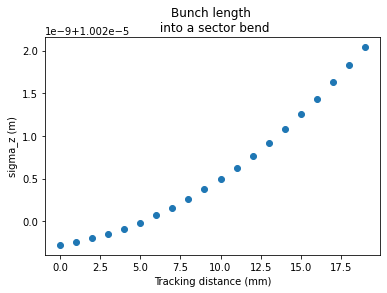

In [169]:
plt.scatter(np.arange(len(data_vec)), data_vec) 
plt.xlabel('Tracking distance (mm)')
plt.ylabel('sigma_z (m)')
plt.title('Bunch length \n into a sector bend')

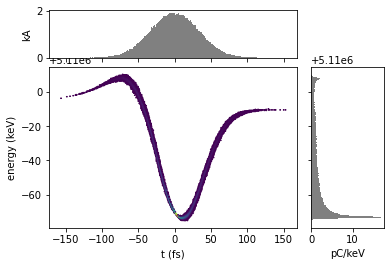

In [224]:
marginal_plot(P, 't', 'energy', bins=250)

/global/homes/w/wlou1991/GitHub/openPMD-beamphysics/pmd_beamphysics/plot.py:193: RuntimeWarning: divide by zero encountered in true_divide
  hist_y, hist_f, hist_prefix = nice_array(hist/hist_width)
/global/homes/w/wlou1991/GitHub/openPMD-beamphysics/pmd_beamphysics/plot.py:193: RuntimeWarning: invalid value encountered in true_divide
  hist_y, hist_f, hist_prefix = nice_array(hist/hist_width)


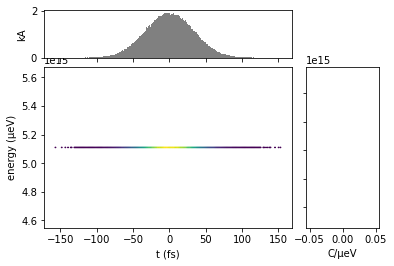

In [227]:
marginal_plot(P, 't', 'energy', bins=250)

# Save and load multiple data for analysis

In [211]:
# Name the file properly to avoid over-writting
np.savetxt("sigma_z_delta_kick_only_20steps.txt", data_vec)

In [204]:
d1 = np.loadtxt("emit_growth_no_csr_20steps.txt")
d2 = np.loadtxt("emit_growth_delta_kick_only_20steps.txt")
d3 = np.loadtxt("emit_growth_xp_kick_only_20steps.txt")
d4 = np.loadtxt("emit_growth_2d_csr_on_20steps.txt")

Text(0.5, 1.0, 'Normalized horizontal emittance growth')

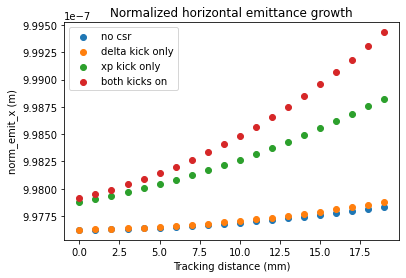

In [205]:
plt.scatter(np.arange(20), d1, label='no csr')
plt.scatter(np.arange(20), d2, label='delta kick only')
plt.scatter(np.arange(20), d3, label='xp kick only')
plt.scatter(np.arange(20), d4, label='both kicks on')

plt.xlabel('Tracking distance (mm)')
plt.ylabel('norm_emit_x (m)')
plt.legend()
plt.title('Normalized horizontal emittance growth')

In [212]:
d1 = np.loadtxt("sigma_z_no_csr_20steps.txt")
d2 = np.loadtxt("sigma_z_delta_kick_only_20steps.txt")
d3 = np.loadtxt("sigma_z_xp_kick_only_20steps.txt")
d4 = np.loadtxt("sigma_z_2d_csr_on_20steps.txt")

Text(0.5, 1.0, 'Bunch length')

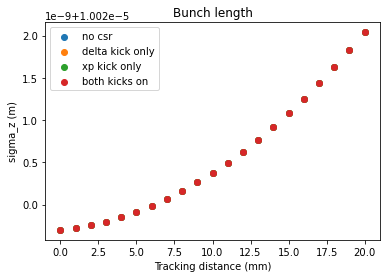

In [213]:
plt.scatter(np.arange(21), d1, label='no csr')
plt.scatter(np.arange(21), d2, label='delta kick only')
plt.scatter(np.arange(21), d3, label='xp kick only')
plt.scatter(np.arange(21), d4, label='both kicks on')

plt.xlabel('Tracking distance (mm)')
plt.ylabel('sigma_z (m)')
plt.legend()
plt.title('Bunch length')